In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024.xls'
df = pd.read_excel(file_path)


In [ ]:
# Cek jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


no                  0
diagnosa            0
institusi           0
area                0
rumah            1131
tipe             2750
biaya_berobat      25
dtype: int64


In [ ]:
# prompt: tolong handle data mising yang ada di kolom fitur fitur berikut ini dengan mengisi kolom data mising:
# no                  0
# diagnosa            0
# institusi           0
# area                0
# rumah            1131
# tipe             2750
# biaya_berobat      25
# dtype: int64

# Mengisi data yang hilang di kolom 'rumah' dengan modus (nilai yang paling sering muncul)
df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)

# Mengisi data yang hilang di kolom 'tipe' dengan modus (nilai yang paling sering muncul)
df['tipe'].fillna(df['tipe'].mode()[0], inplace=True)

# Mengisi data yang hilang di kolom 'biaya_berobat' dengan median (nilai tengah)
df['biaya_berobat'].fillna(df['biaya_berobat'].median(), inplace=True)

# Cek kembali jumlah data yang hilang setelah penanganan
print(df.isnull().sum())


no               0
diagnosa         0
institusi        0
area             0
rumah            0
tipe             0
biaya_berobat    0
dtype: int64


<ipython-input-17-41d3d8a28f36>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)
<ipython-input-17-41d3d8a28f36>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# prompt: simpan dataset yang sudah terhandle, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx


In [ ]:
# prompt: tolong buat semua isi data menjadi lowercase dan buat agar isi kolom fitur biaya_berobat menjadi range 250.000, jadi contoh pertama 0-250.000 lalu kedua ada 250.000-500.000

# Convert all string columns to lowercase
for column in df.select_dtypes(['object']):
  df[column] = df[column].str.lower()

# Create a new column for the range of biaya_berobat
def categorize_biaya(biaya):
  if biaya <= 250000:
    return '0-250.000'
  elif biaya <= 500000:
    return '250.000-500.000'
  elif biaya <= 750000:
    return '500.000-750.000'
  elif biaya <= 1000000:
    return '750.000-1.000.000'
  else:
    return '>1.000.000'

df['range_biaya_berobat'] = df['biaya_berobat'].apply(categorize_biaya)

# Print the updated DataFrame
print(df.head())


# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum      1172500.0          >1.000.000  
1  dokter umum       454000.0     250.000-500.000  
2  dokter umum        59000.0           0-250.000  
3  dokter umum        80500.0           0-250.000  
4  dokter umum       586000.0     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


In [ ]:
# prompt: simpan dataset yang sudah diubah, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


In [ ]:
# prompt: dari dataset di atas lakukan tranformasi data (data diskretisasi) pada fitur dataset yang dibutuhkan

from sklearn.preprocessing import KBinsDiscretizer

# Pilih fitur yang akan didiskretisasi (contoh: biaya_berobat)
fitur_diskret = ['biaya_berobat']

# Tentukan jumlah bin (interval) yang diinginkan
n_bins = 5

# Buat objek KBinsDiscretizer
est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Transformasikan data
df[fitur_diskret] = est.fit_transform(df[fitur_diskret])

# Print DataFrame yang telah didiskretisasi
print(df.head())

# Simpan dataset yang sudah didiskretisasi ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range_discretized.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum            0.0          >1.000.000  
1  dokter umum            0.0     250.000-500.000  
2  dokter umum            0.0           0-250.000  
3  dokter umum            0.0           0-250.000  
4  dokter umum            0.0     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range_discretized.xlsx


In [7]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df = pd.read_excel(file_path)
df.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,range_biaya_berobat
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500,>1.000.000
1,2,hiperlipidemia,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,454000,250.000-500.000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000,0-250.000
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500,0-250.000
4,5,check up,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,586000,500.000-750.000


In [8]:
df.head(10)

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,range_biaya_berobat
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500,>1.000.000
1,2,hiperlipidemia,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,454000,250.000-500.000
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000,0-250.000
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500,0-250.000
4,5,check up,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,586000,500.000-750.000
5,6,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,137860,0-250.000
6,7,pemeriksaan,rumah sakit,bandung,rs borromeus,dokter umum,546900,500.000-750.000
7,8,syaraf,rumah sakit,bandung,rs borromeus,spesialis saraf (neurologi),1471700,>1.000.000
8,9,jantung,rumah sakit,bandung,rs borromeus,spesialis penyakit dalam,2368800,>1.000.000
9,10,konsul dokter,rumah sakit,bandung,rs borromeus,dokter umum,3217300,>1.000.000


In [9]:
df.tail()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,range_biaya_berobat
4995,4996,ranap 15-18jan2022,rumah sakit,bandung,rs santo barromeus,dokter umum,4821801,>1.000.000
4996,4997,demam,laboratorium,bandung,klinik bhakti ip kosaka garut,dokter umum,131000,0-250.000
4997,4998,cek lab- typus,laboratorium,bandung,klinik bhakti ip kosaka garut,dokter umum,401000,250.000-500.000
4998,4999,cek darah setelah dbd,laboratorium,bandung,klinik bhakti ip kosaka garut,dokter umum,131000,0-250.000
4999,5000,hipertensi - 019/kes/peg/adk/kmj/2022,poliklinik,bandung,kbip,dokter umum,150610,0-250.000


In [11]:
df.dtypes

,0
no,int64
diagnosa,object
institusi,object
area,object
rumah,object
tipe,object
biaya_berobat,int64
range_biaya_berobat,object


UNIVARIATE ANALYSIS

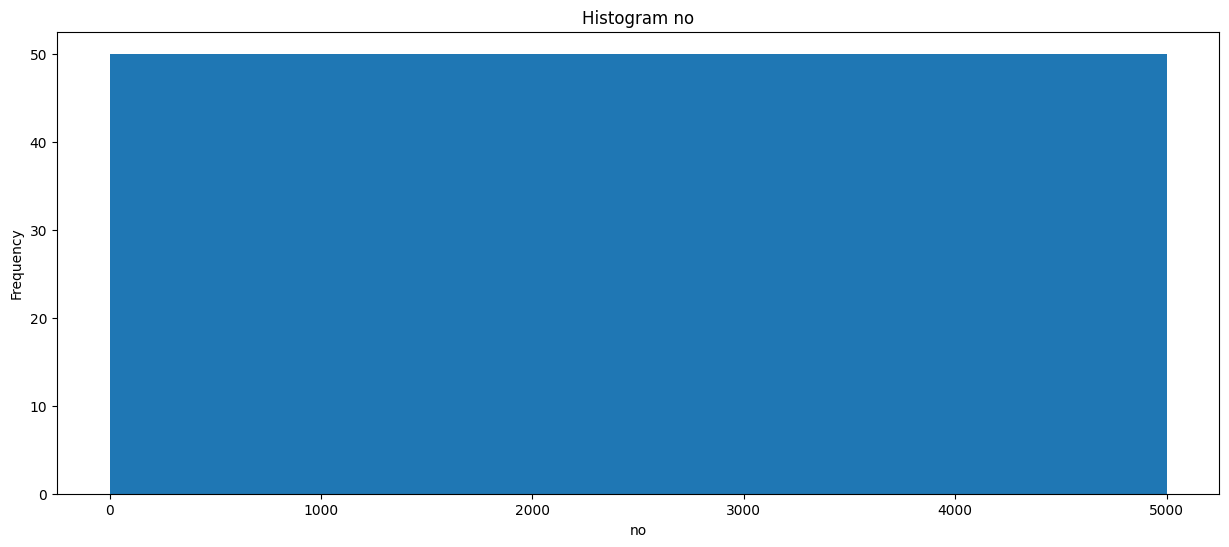

In [25]:
import matplotlib.pyplot as plt


col = "no"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=100)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


Analisis: Dari histogram tersebut nomor memiliki jumlah yang sama pada setiap data

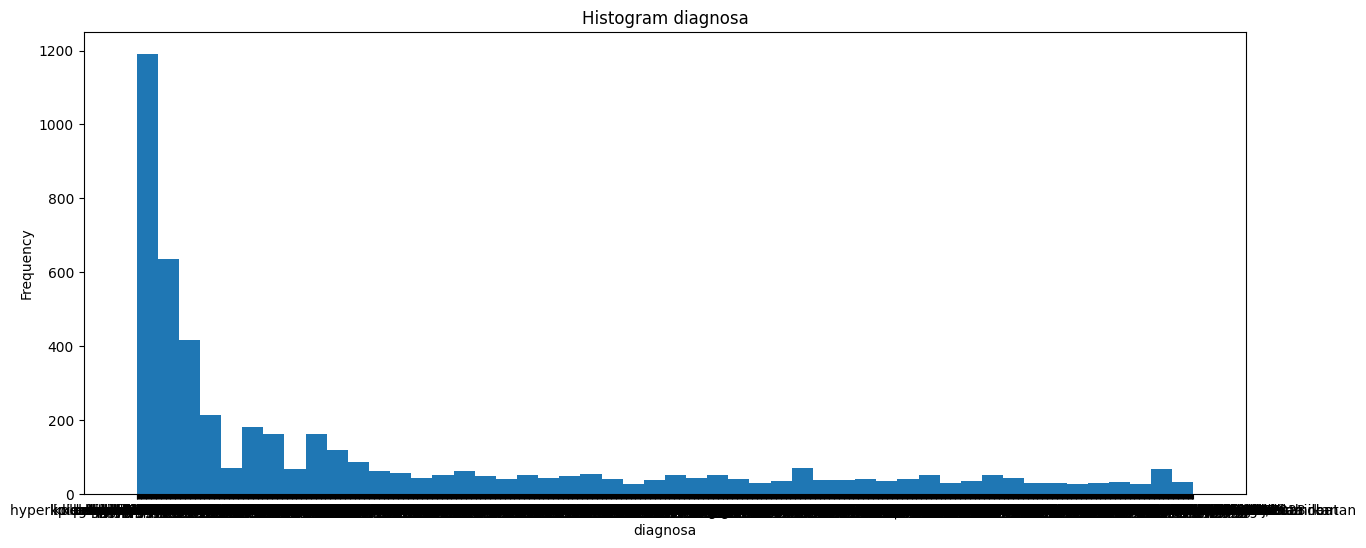

In [26]:
col = "diagnosa"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


Analisis: Dari histogram tersebut terlihat ada satu diagnosa yang memiliki jumlah paling banyak hampir mencapai angka 1200

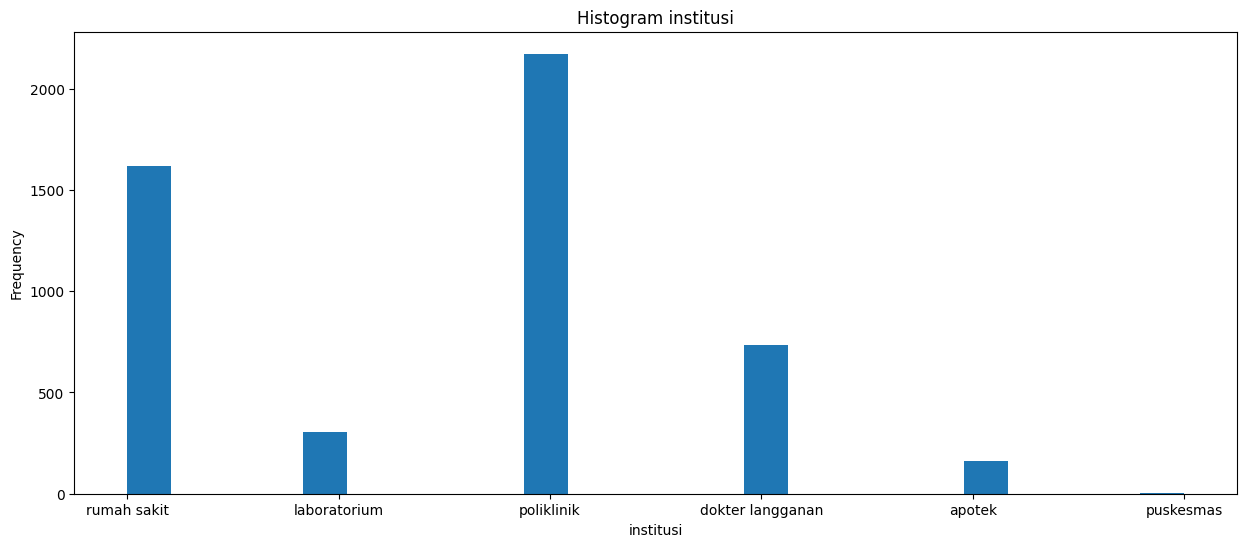

In [27]:
col = "institusi"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=24)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Terlihat poliklinik menempati posisi teratas dengan lebih dari 2000 orang, sedangkan diposisi ke dua ada rumah sakit dengan lebih dari 1500 orang

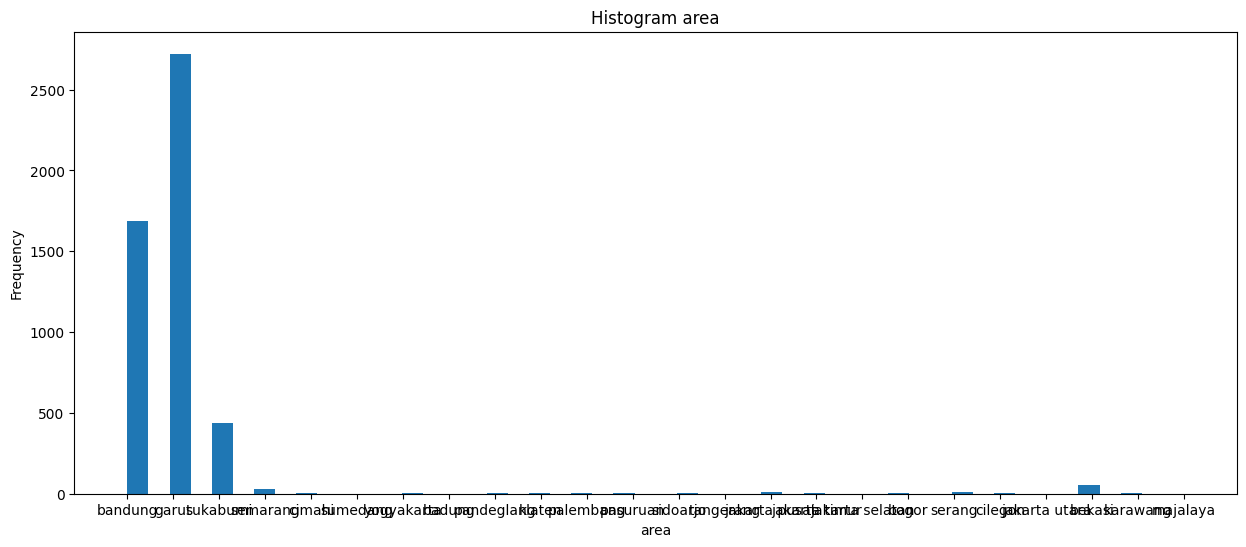

In [28]:
col = "area"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Dari hasil diatas Garut merupakan lokasi asal orang berobat terbanyak dengan lebih dari 2500 orang, diikuti oleh Bandung dan Sukabumi

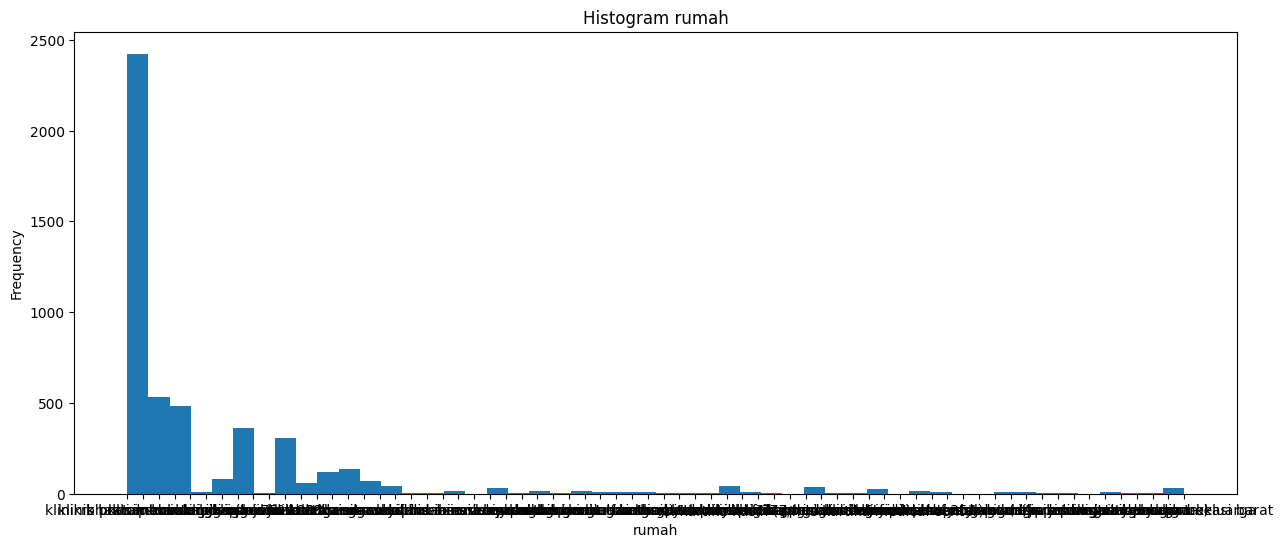

In [29]:
col = "rumah"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

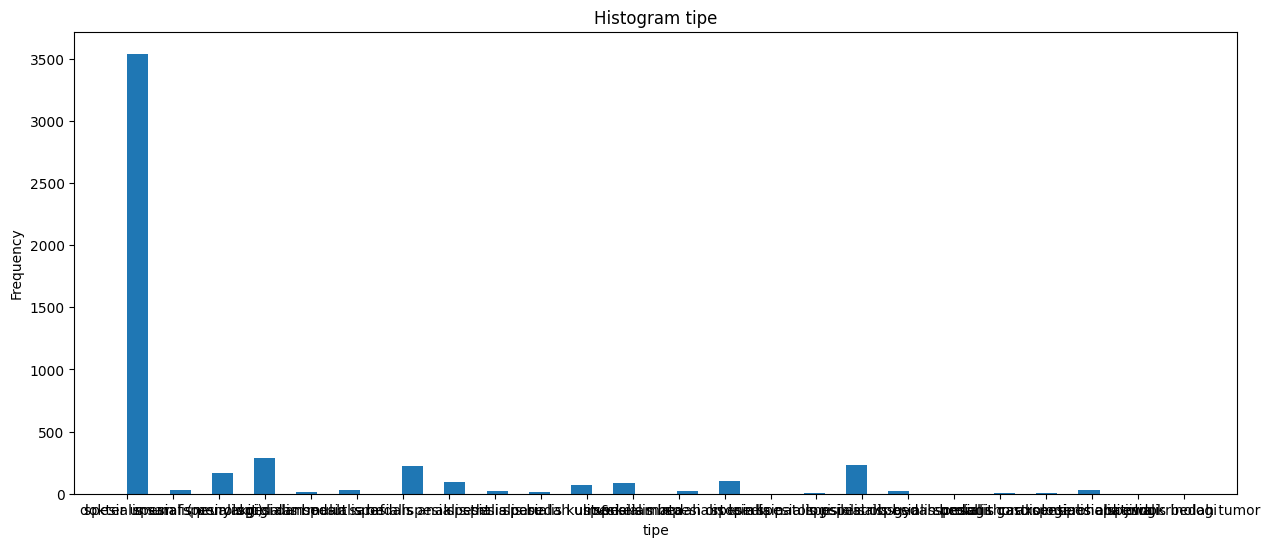

In [30]:
col = "tipe"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Dari histogram tersebut terlihat bahwa Dokter Umum merupakan yang paling sering dikunjungi

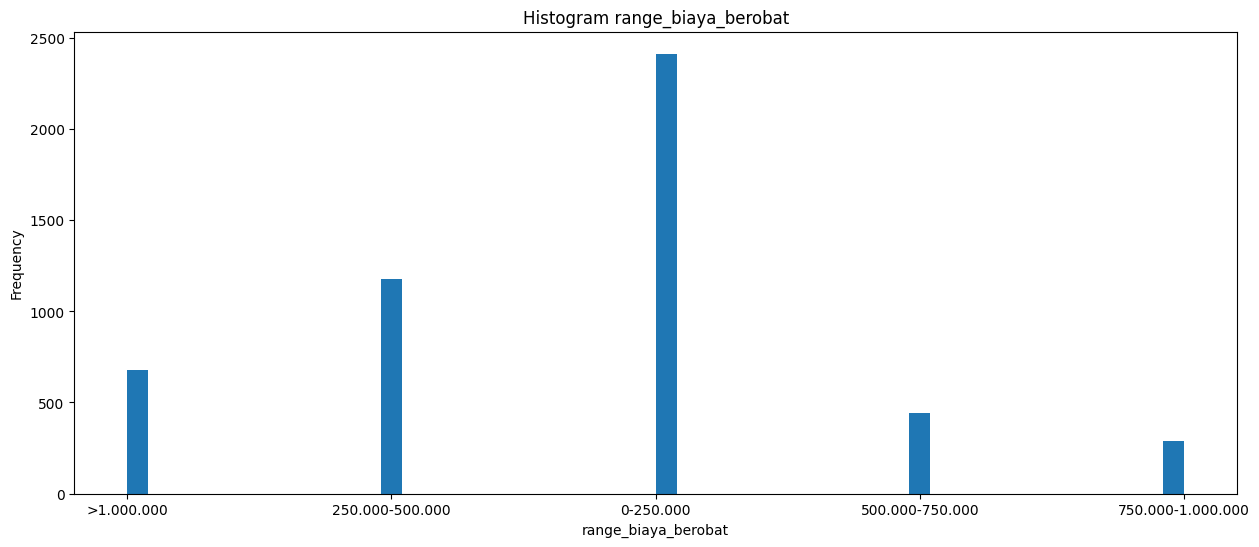

In [31]:
col = "range_biaya_berobat"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Terlihat jika range biaya berobat yang paling banyak yaitu 0-250.000

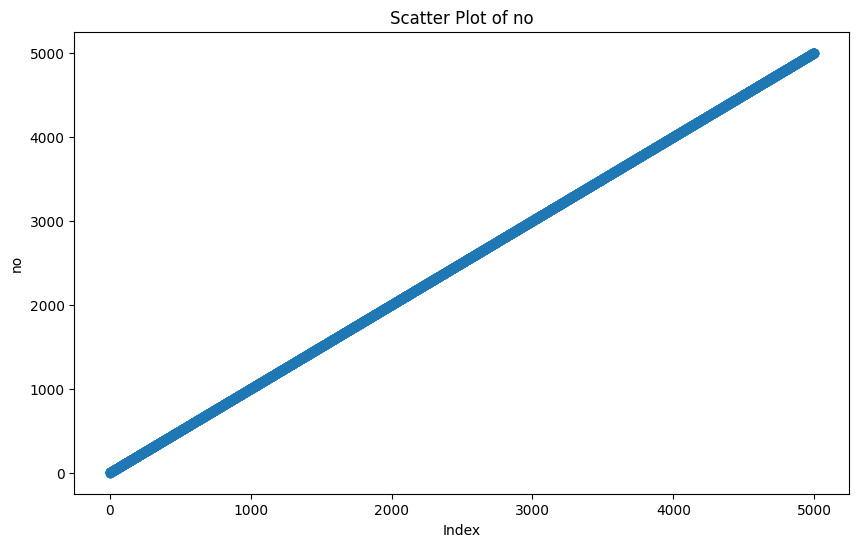

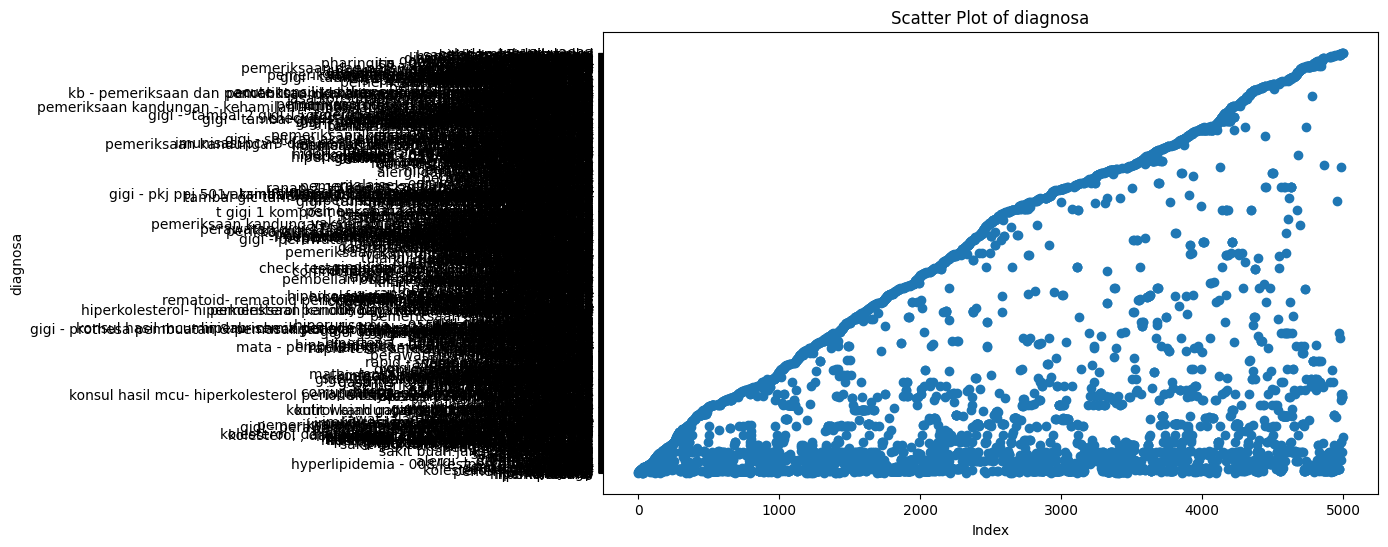

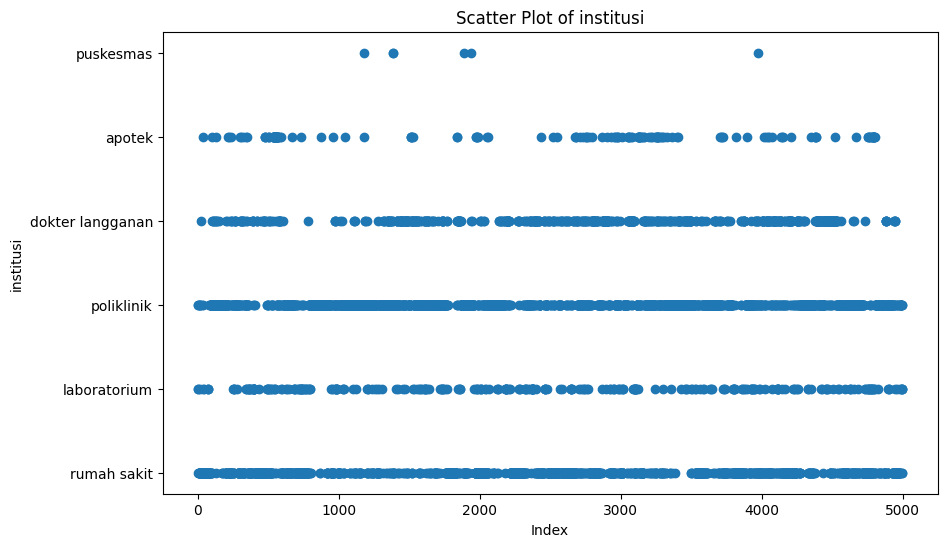

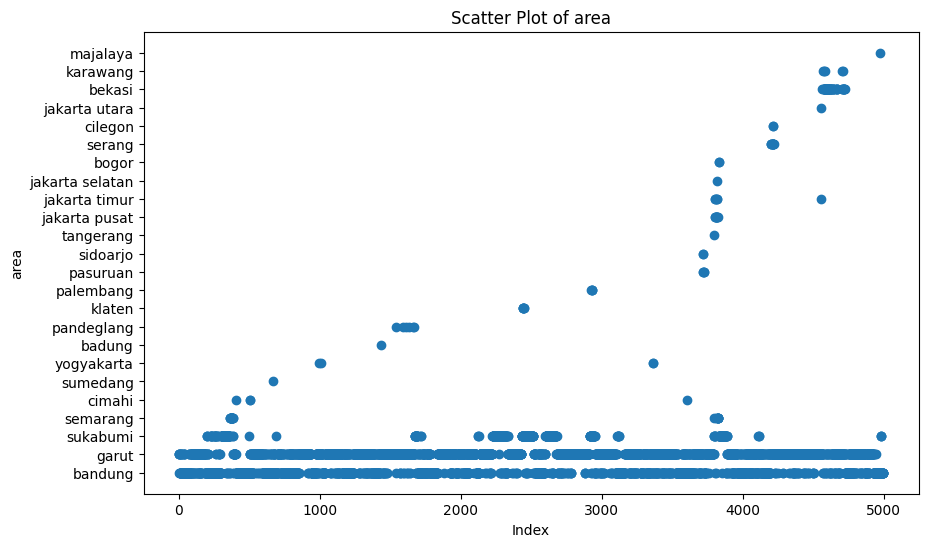

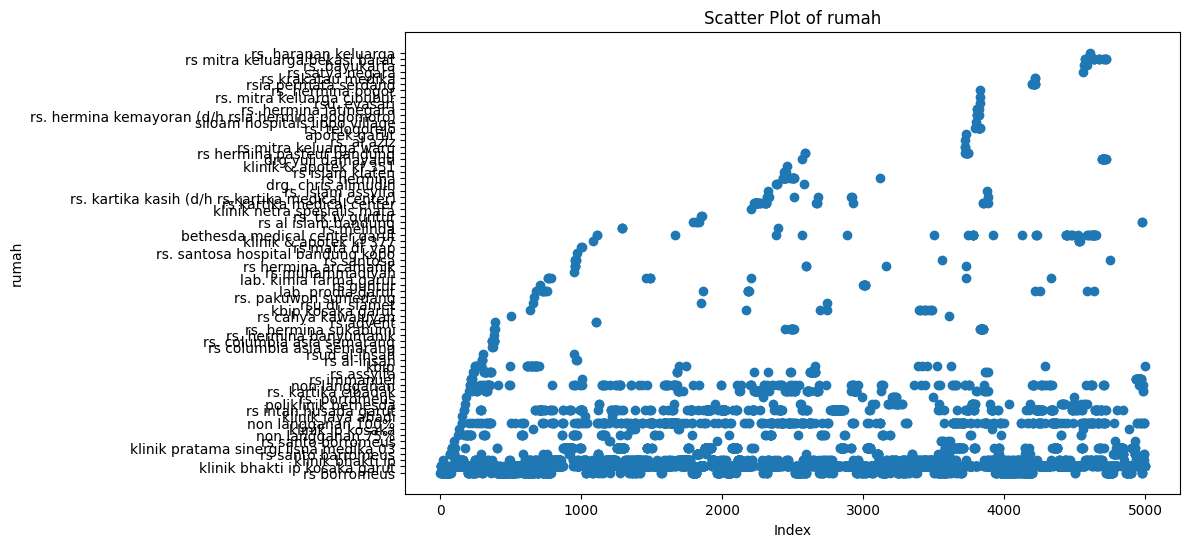

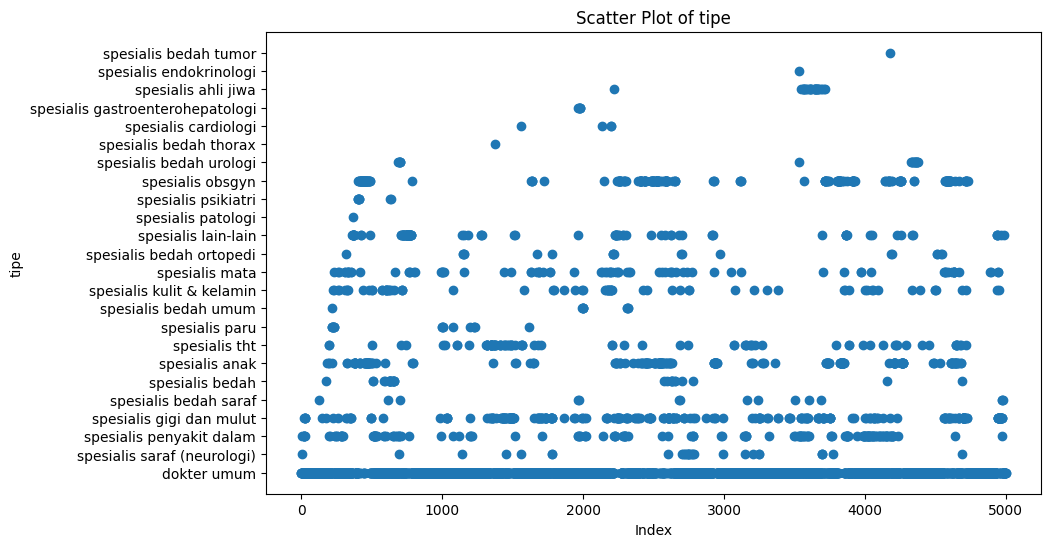

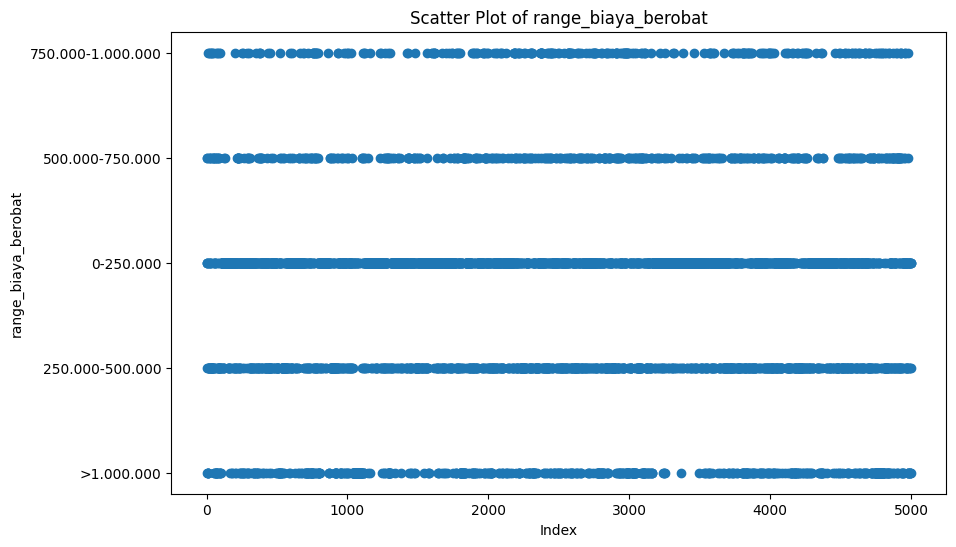

In [43]:
import matplotlib.pyplot as plt

# Daftar kolom yang ingin ditampilkan
kolom_pilihan = ["no", "diagnosa", "institusi", "area", "rumah", "tipe", "range_biaya_berobat"]

for kolom in kolom_pilihan:
  plt.figure(figsize=(10, 6))
  plt.scatter(df.index, df[kolom])
  plt.title(f"Scatter Plot of {kolom}")
  plt.xlabel("Index")
  plt.ylabel(kolom)
  plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])


dataolahencoding.head()

,no,diagnosa,institusi,area,rumah,tipe,biaya_berobat,range_biaya_berobat,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,hiperkolesterol,rumah sakit,bandung,rs borromeus,dokter umum,1172500,>1.000.000,404,5,1,24,0,2724
1,2,hiperlipidemia,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,454000,250.000-500.000,409,2,6,9,0,1890
2,3,hiperlipidemia,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,59000,0-250.000,409,3,6,9,0,51
3,4,vertigo,poliklinik,garut,klinik bhakti ip kosaka garut,dokter umum,80500,0-250.000,1270,3,6,9,0,137
4,5,check up,laboratorium,garut,klinik bhakti ip kosaka garut,dokter umum,586000,500.000-750.000,119,2,6,9,0,2181


In [45]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'range_biaya_berobat'], axis=1)
dataolahencoding.head()


,no,biaya_berobat,diagnosa_encod,institusi_encod,area_encod,rumah_encod,tipe_encod,biaya_berobat_encod
0,1,1172500,404,5,1,24,0,2724
1,2,454000,409,2,6,9,0,1890
2,3,59000,409,3,6,9,0,51
3,4,80500,1270,3,6,9,0,137
4,5,586000,119,2,6,9,0,2181


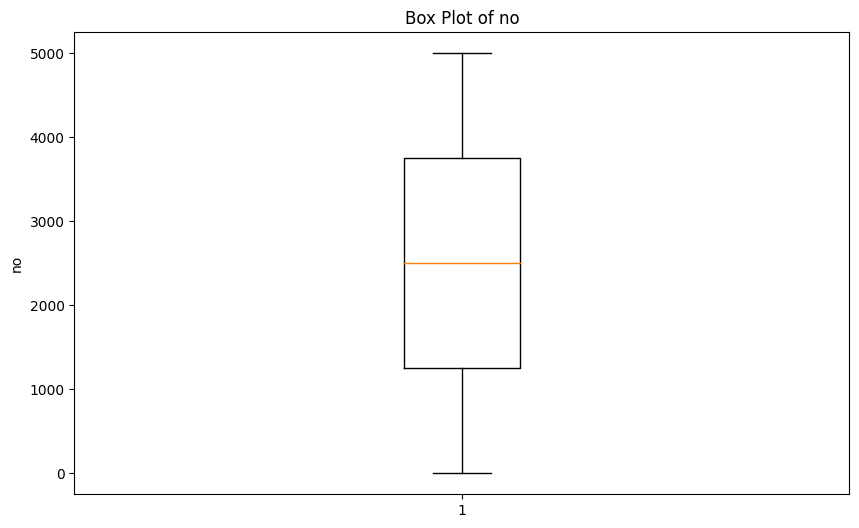

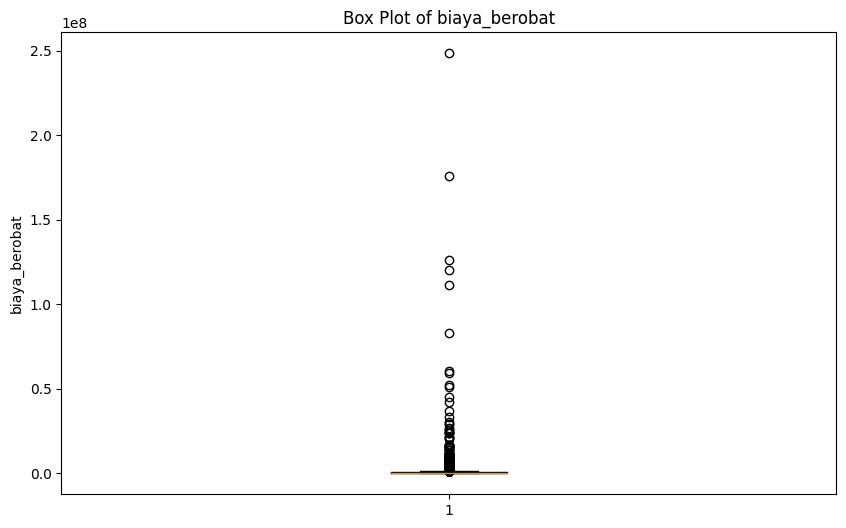

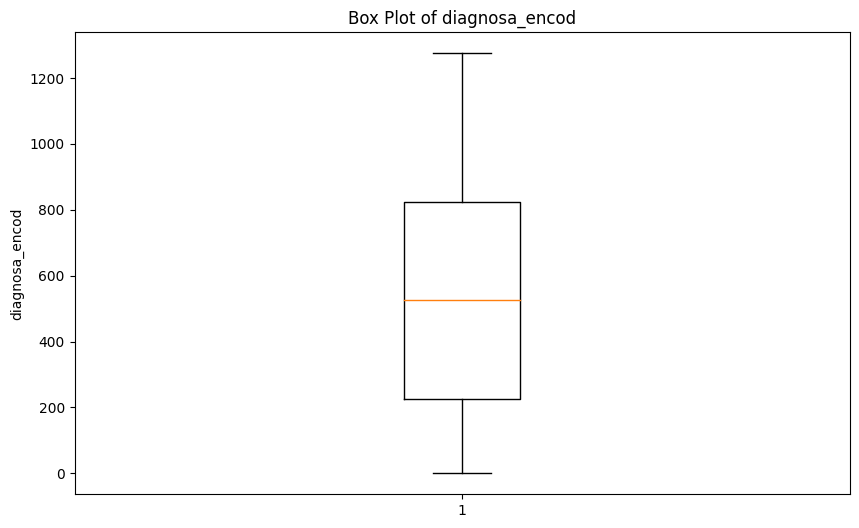

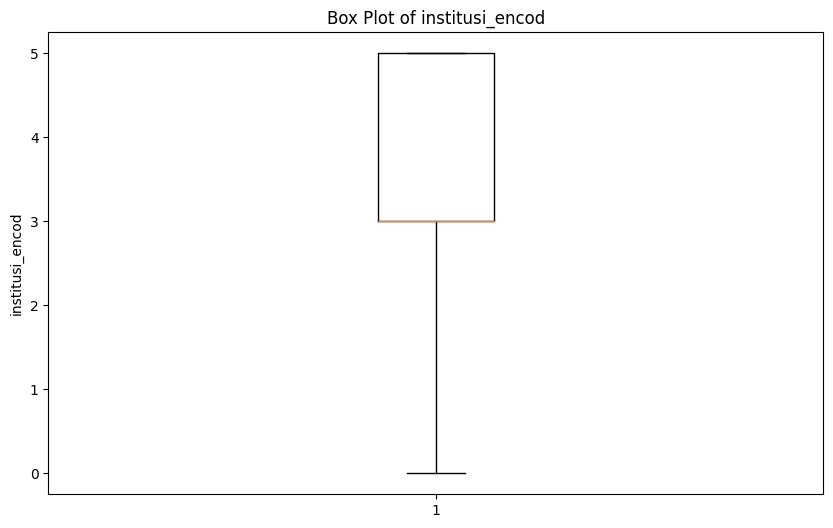

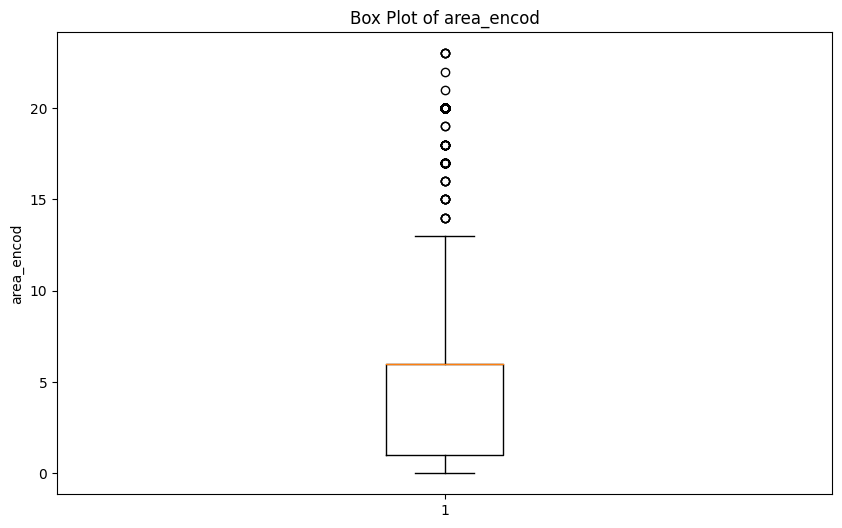

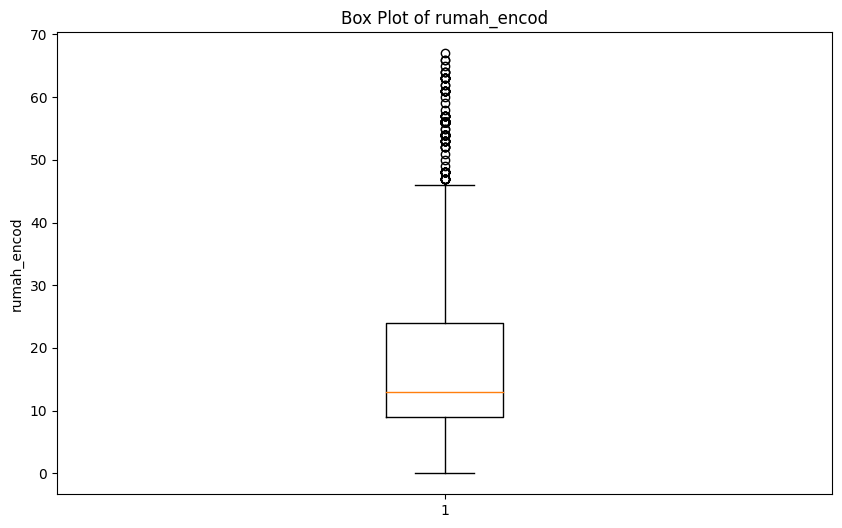

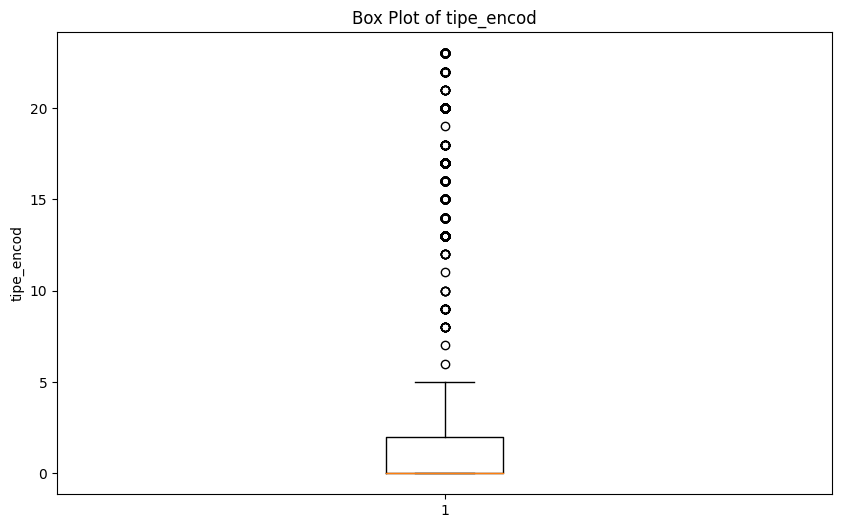

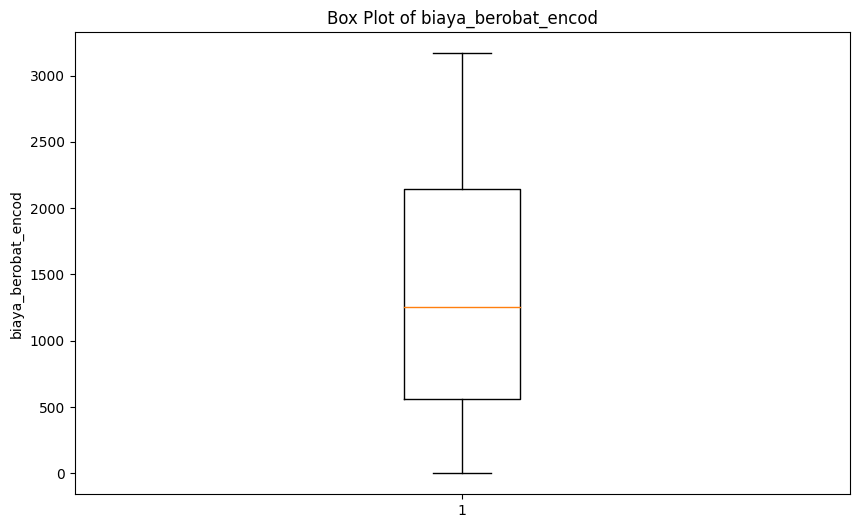

In [46]:
# Daftar kolom yang ingin ditampilkan
kolom_pilihan = ["no", "diagnosa", "institusi", "area", "rumah", "tipe", "range_biaya_berobat"]

for column in dataolahencoding.columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(dataolahencoding[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()

In [47]:
import numpy as np

def find_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()


Kolom 'biaya_berobat' memiliki outlier:
[1471700, 2368800, 3217300, 1335200, 1384696, 1458022, 1369582, 1942087, 1762200, 2319548, 1667122, 1339833, 2370718, 1508790, 1267913, 2200981, 1650700, 1737500, 9374800, 7056185, 1379627, 2829860, 11390731, 8469873, 1552673, 2120000, 1920000, 1800000, 12092611, 1520000, 4896719, 1453164, 5310347, 1823000, 1501000, 1225750, 1800000, 2000000, 248391800, 1320050, 1800000, 1442133, 1792167, 1950000, 23878600, 11307500, 1800000, 2400300, 2356600, 2355700, 1848400, 1848400, 1773400, 2356700, 2000000, 1820900, 3039500, 1937400, 1589000, 1641800, 1537869, 3625000, 8109200, 3497000, 15564300, 5914000, 1789200, 26757000, 23723000, 4499400, 2007000, 14020000, 1938204, 2178486, 120013094, 2194030, 2224513, 1800000, 1393605, 1343855, 1343855, 1409205, 9629469, 1208206, 1231283, 5000000, 6852000, 1507000, 2000000, 1800000, 2000000, 3054977, 4821775, 1547000, 6090000, 5676000, 15138025, 175840927, 3772087, 9722058, 2538815, 6781606, 1309355, 1319700, 1982250,

MULTIVARIATE ANALYSIS

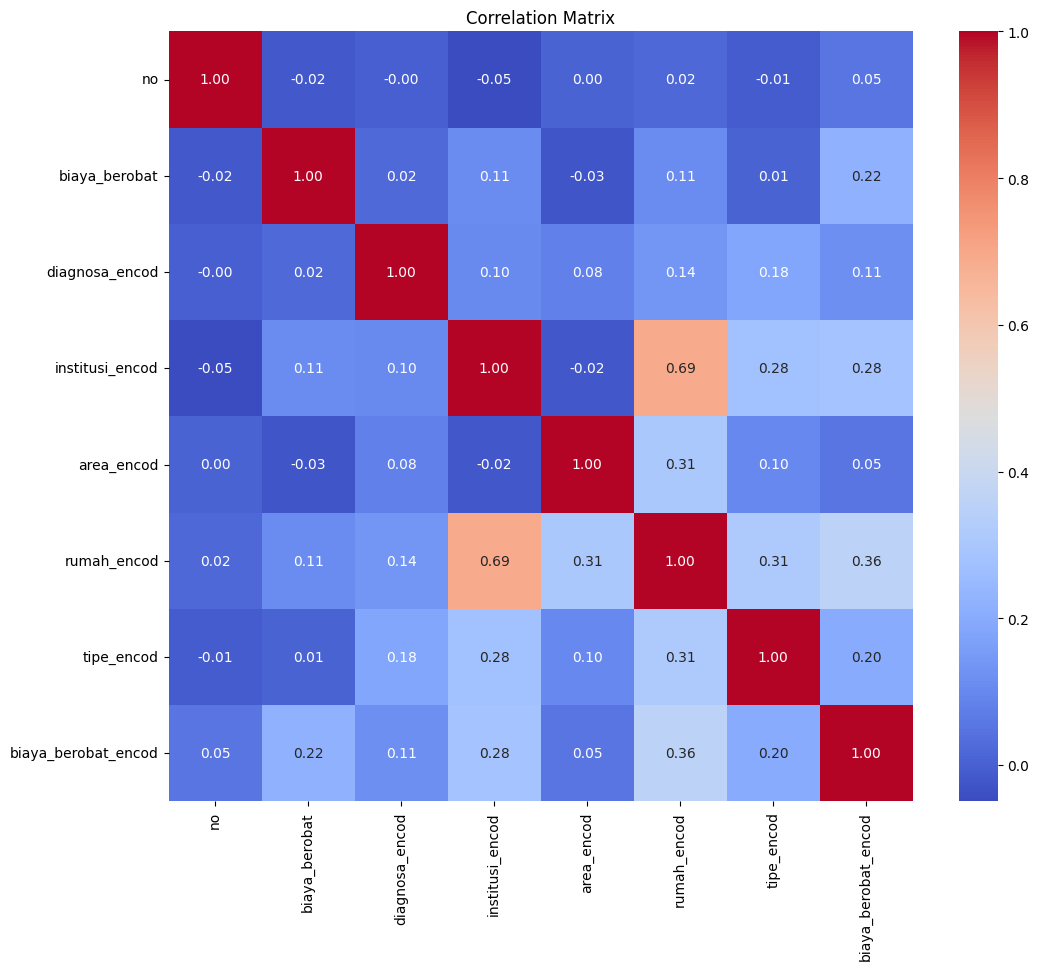

In [48]:
import seaborn as sns

correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


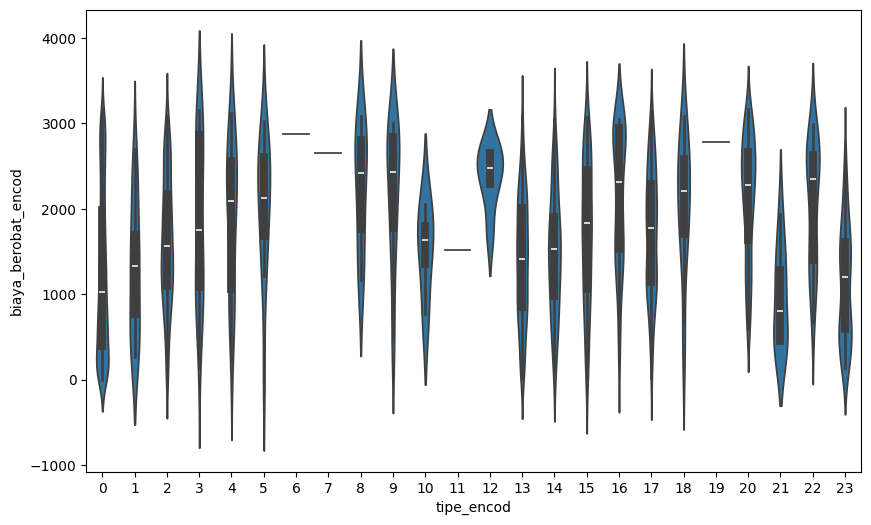

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='tipe_encod', y='biaya_berobat_encod', data=dataolahencoding)
plt.show()

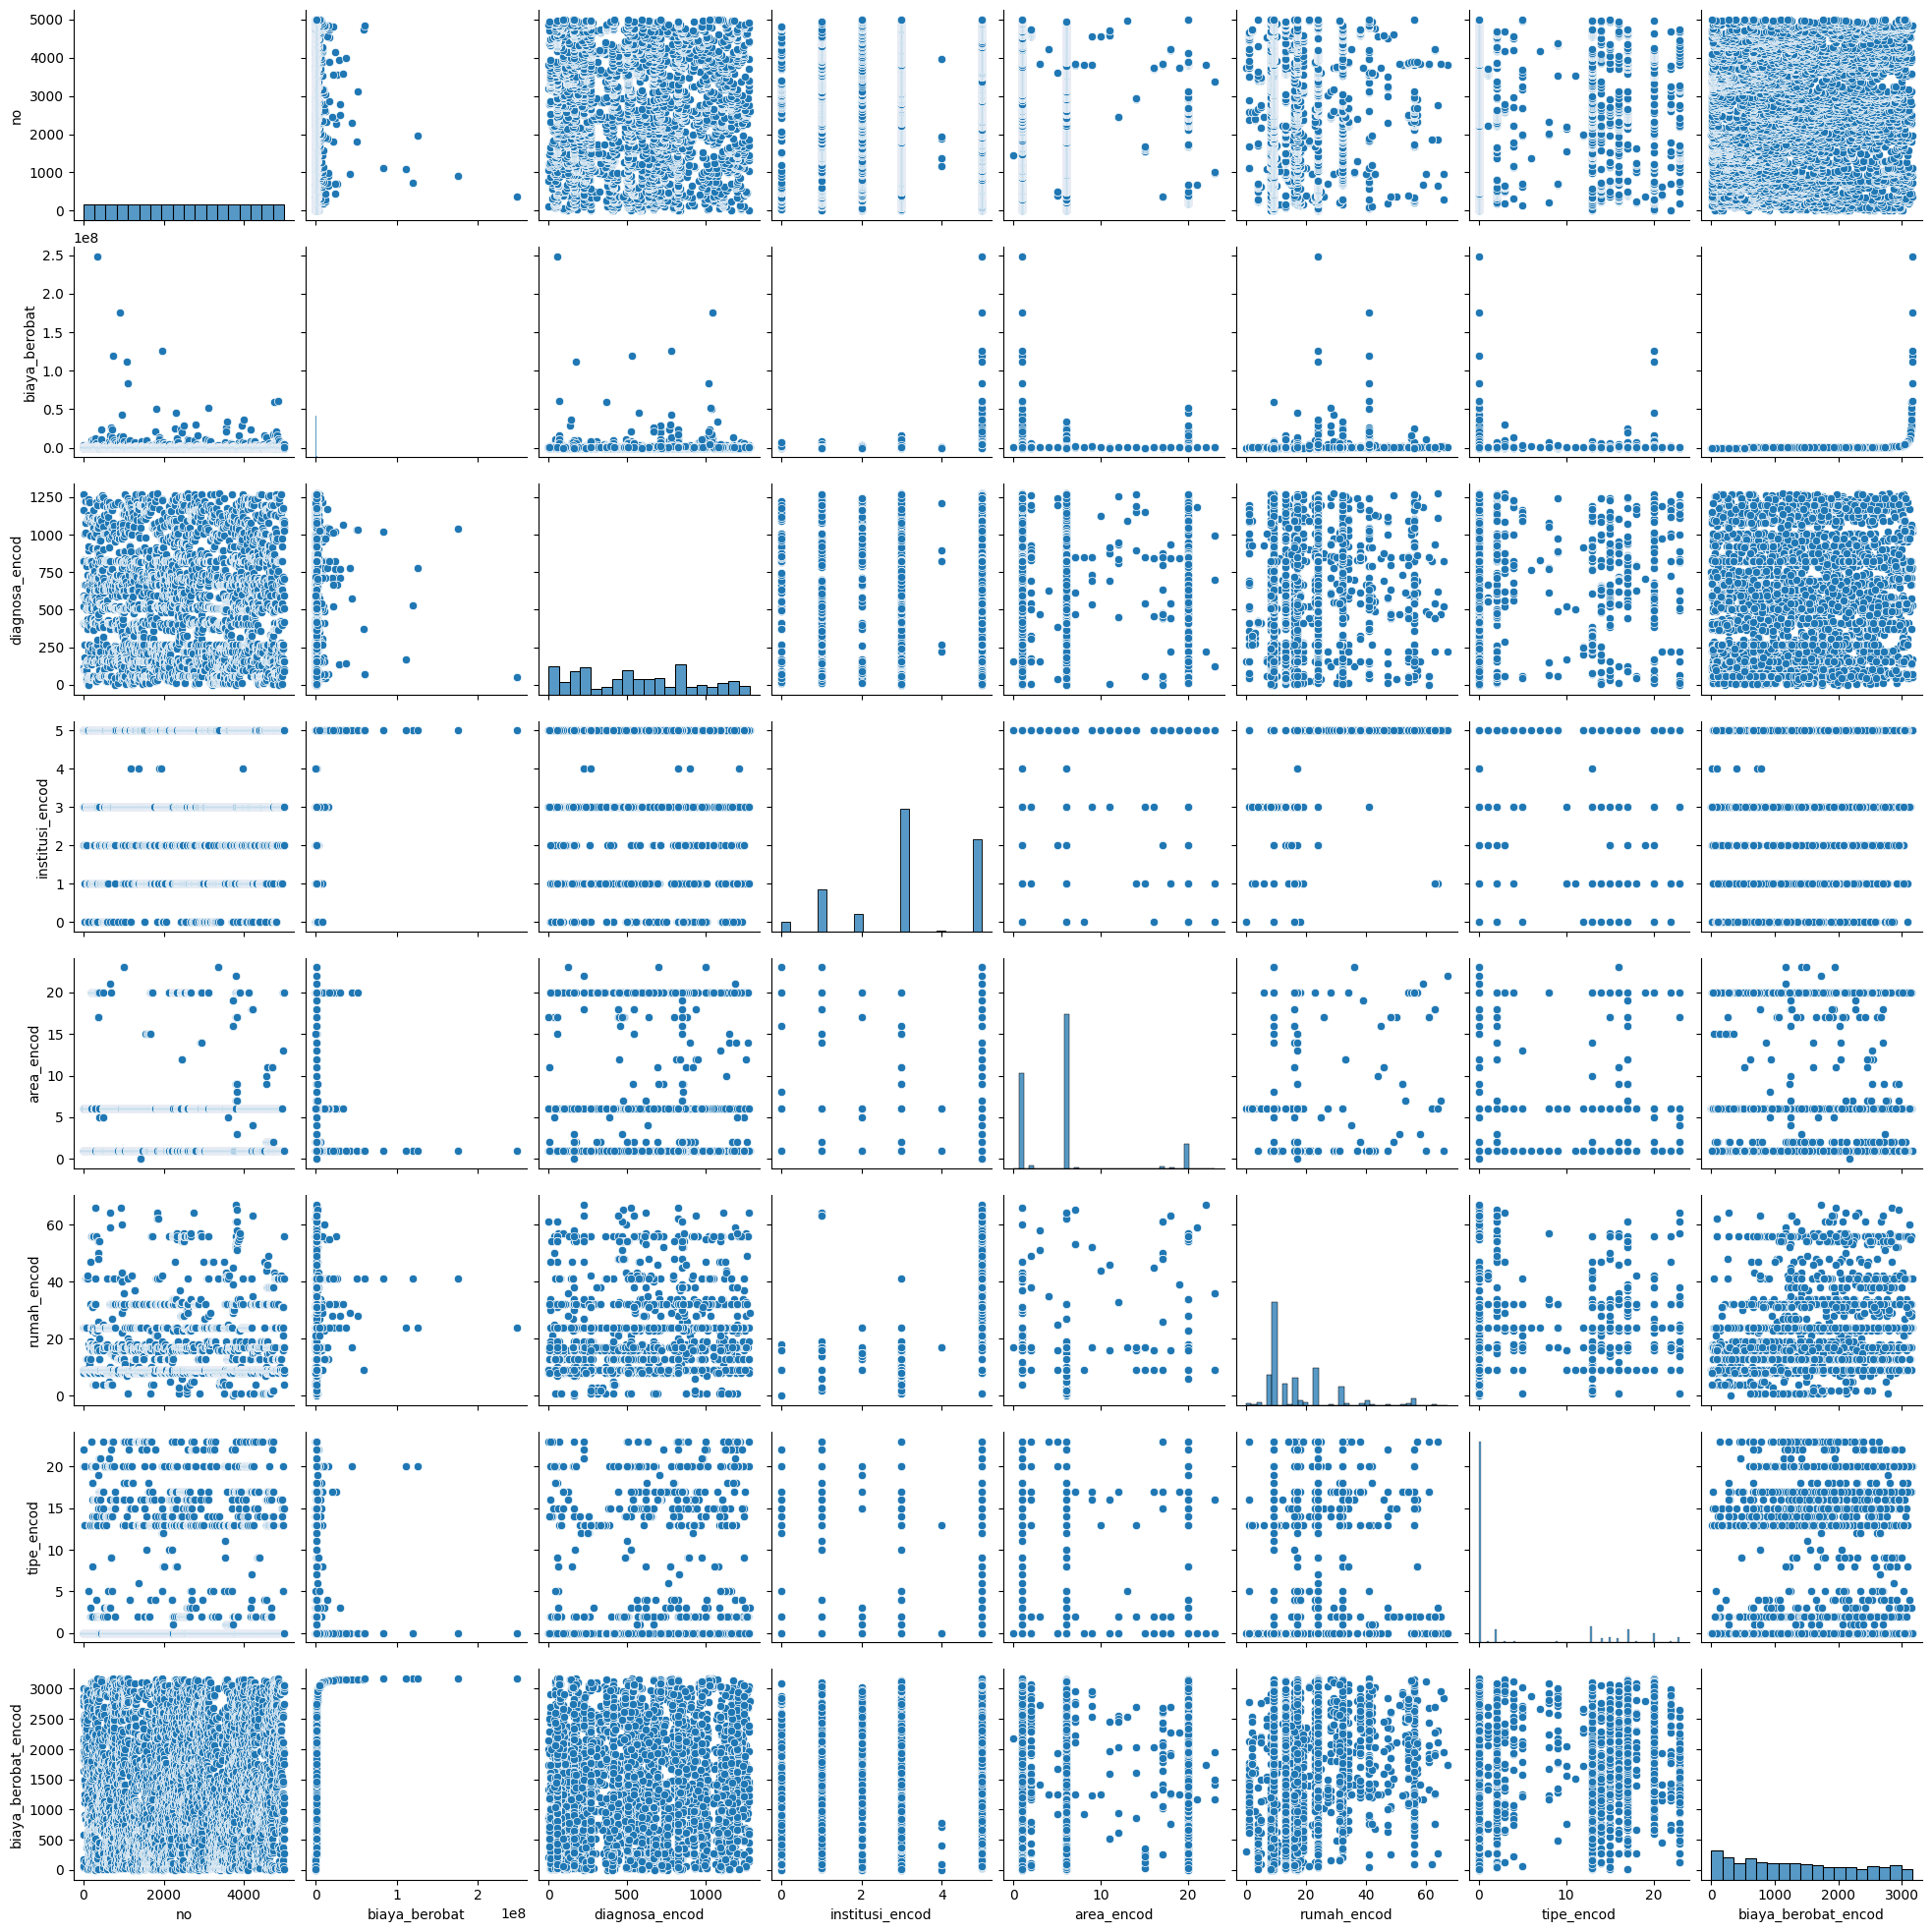

In [53]:
sns.pairplot(dataolahencoding)
plt.show()


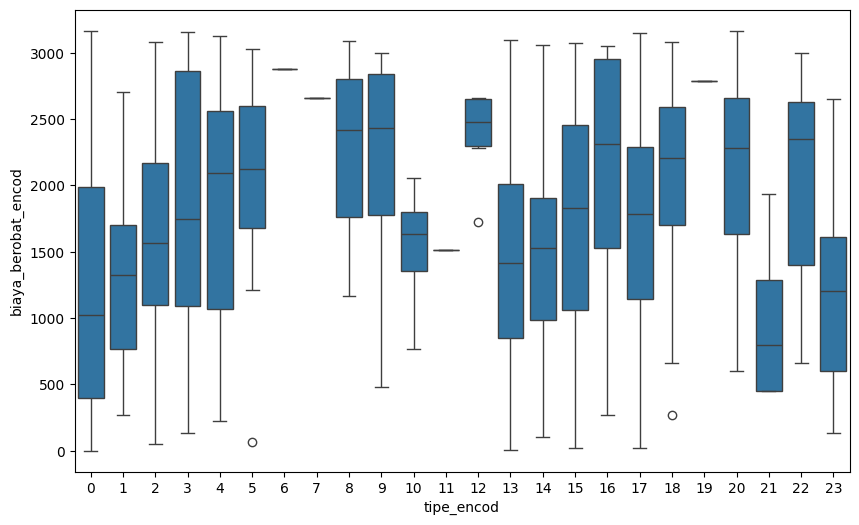

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipe_encod', y='biaya_berobat_encod', data=dataolahencoding)
plt.show()

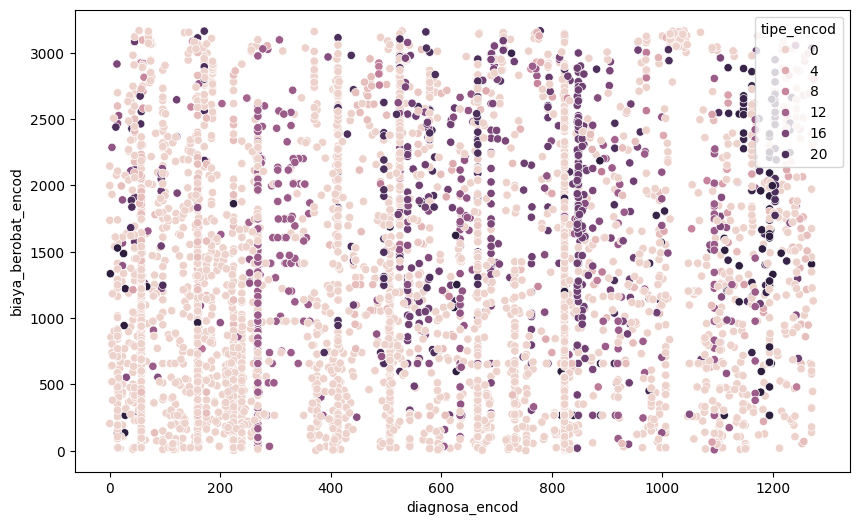

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diagnosa_encod', y='biaya_berobat_encod', hue='tipe_encod', data=dataolahencoding)
plt.show()